In [1]:
# Deleting the .apperception_cache if it exists, as to avoid DB conflict errors
import os
import shutil

dirpath = os.path.join('.apperception_cache')
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

In [2]:
import sys
sys.path.append(os.path.join(os.getcwd(),"apperception"))

### IMPORTS
import lens
import point
from new_world import empty_world

# Let's define some attribute for constructing the world first
name = "trafficScene"  # world name
units = "metrics"  # world units
video_file = "amber_videos/traffic-scene-shorter.mp4"  # example video file
lens_attrs = {"fov": 120, "cam_origin": (0, 0, 0), "skew_factor": 0}
point_attrs = {"p_id": "p1", "cam_id": "cam1", "x": 0, "y": 0, "z": 0, "time": None, "type": "pos"}
camera_attrs = {"ratio": 0.5}
fps = 30

# 1. define a world
traffic_world = empty_world(name)

# 2. construct a camera
fov, res, cam_origin, skew_factor = (
    lens_attrs["fov"],
    [1280, 720],
    lens_attrs["cam_origin"],
    lens_attrs["skew_factor"],
)
cam_lens = lens.PinholeLens(res, cam_origin, fov, skew_factor)

pt_id, cam_id, x, y, z, time, pt_type = (
    point_attrs["p_id"],
    point_attrs["cam_id"],
    point_attrs["x"],
    point_attrs["y"],
    point_attrs["z"],
    point_attrs["time"],
    point_attrs["type"],
)
location = point.Point(pt_id, cam_id, (x, y, z), time, pt_type)

ratio = camera_attrs["ratio"]

# ingest the camera into the world
traffic_world = traffic_world.add_camera(
    cam_id=cam_id,
    location=location,
    ratio=ratio,
    video_file=video_file,
    metadata_identifier=name + "_" + cam_id,
    lens=cam_lens,
)

# Call execute on the world to run the detection algorithm and save the real data to the database
recognized_world = traffic_world.recognize(cam_id)

volume = traffic_world.select_intersection_of_interest_or_use_default(cam_id=cam_id)

get backend Qt5Agg


In [3]:
cams = traffic_world.get_camera()
lens = traffic_world.get_len()
# ids = traffic_world.get_id()
print("cameras are", cams)
print("lens are", lens)
# print("ids are", ids)

cameras are [('cam1', 0.5, 0.0, 0.0, 0.0, 369.5041722813606, 207.84609690826534, 120, 0.0)]
lens are [(0.5, 0.0, 0.0, 0.0, 120, 0.0)]


In [4]:
# This piece of code is unsafe, and should not be run if not needed. 
# It serves for test purposes when one recieves a "dead kernel" error.
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

filtered_world = recognized_world.filter_traj_type("car").filter_traj_volume(volume).interval(0, fps * 3)
filtered_ids = filtered_world.get_traj_key()
print("filtered_ids are", filtered_ids)

Loading weights from C:\Users\youse\Desktop\Research\Apperception\apperception\apperception\../yolov5-deepsort/deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
YOLOv5  v6.0-159-gdb6ec66 torch 1.10.2+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients


car-1 saved successfully
person-2 saved successfully
traffic light-3 saved successfully
car-4 saved successfully
car-6 saved successfully
person-7 saved successfully
traffic light-8 saved successfully
person-9 saved successfully
person-10 saved successfully
traffic light-12 saved successfully
person-12 saved successfully
person-13 saved successfully
car-14 saved successfully
person-16 saved successfully
bus-14 saved successfully
car-19 saved successfully
traffic light-10 saved successfully
traffic light-13 saved successfully
person-20 saved successfully
car-21 saved successfully
truck-21 saved successfully
bus-21 saved successfully
person-25 saved successfully
person-26 saved successfully
traffic light-26 saved successfully
traffic light-9 saved successfully
get_traj_key SELECT sq2.itemid FROM (SELECT * FROM (SELECT * FROM (SELECT * FROM item_general_trajectory WHERE worldId='a29b573e-70a0-4b6c-b19d-4f453867ce4f') sq0 WHERE sq0.objecttype='car') sq1 WHERE overlap(sq1.largestBbox,'STBOX

In [5]:
trajectory = filtered_world.get_traj()
print("trajectories are", trajectory)

get_traj SELECT asMFJSON(trajCentroids)::json->'coordinates' FROM (SELECT * FROM (SELECT * FROM (SELECT * FROM item_general_trajectory WHERE worldId='a29b573e-70a0-4b6c-b19d-4f453867ce4f') sq0 WHERE sq0.objecttype='car') sq1 WHERE overlap(sq1.largestBbox,'STBOX Z((0.01082532, 2.59647246, 0),(3.01034039, 3.35985782, 2))')) as final
trajectories are [([[2.212424273730558, 2.574019950137081, 1], [2.212424273730558, 2.574019950137081, 1], [2.213777438423971, 2.574019950137081, 1], [2.213777438423971, 2.574019950137081, 1], [2.213777438423971, 2.574019950137081, 1], [2.213777438423971, 2.574019950137081, 1], [2.213777438423971, 2.574019950137081, 1], [2.213777438423971, 2.574019950137081, 1], [2.213777438423971, 2.574019950137081, 1], [2.212424273730558, 2.574019950137081, 1], [2.213777438423971, 2.574019950137081, 1], [2.213777438423971, 2.574019950137081, 1], [2.213777438423971, 2.574019950137081, 1], [2.212424273730558, 2.574019950137081, 1], [2.212424273730558, 2.574019950137081, 1], [2

In [6]:
headings = filtered_world.get_headings()
print("headings are", headings)

get_traj SELECT asMFJSON(trajCentroids)::json->'coordinates' FROM (SELECT * FROM (SELECT * FROM (SELECT * FROM item_general_trajectory WHERE worldId='a29b573e-70a0-4b6c-b19d-4f453867ce4f') sq0 WHERE sq0.objecttype='car') sq1 WHERE overlap(sq1.largestBbox,'STBOX Z((0.01082532, 2.59647246, 0),(3.01034039, 3.35985782, 2))')) as final
headings are [[None, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 240.64224645719918, 0.0, 0.0, 0.0, 270.0, 105.70863782901449, 254.29136217098548, 0.0, 0.0, 0.0, 0.0, 90.0, 240.64224645720623, 74.29136217098551, 270.0, 0.0, 90.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 90.0, 0.0, 0.0, 270.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 299.35775354278474, 0.0, 318.36646066342803, 119.35775354278525, 299.35775354278525, 0.0, 270.0, 0.0, 270.0, 0.0, 90.0, 270.0, 0.0, 0.0, 0.0, 90.0, 119.35775354279377, 119.35775354279377, 270.0, 90.0, 270.0, 0.0, 0.0, 270.0, 0.0, 0.0, 90.0, 0.0, 0.0, 0.0, 285.7086378290145, 90.0, 0.0, 90.0, 270.0, 119.

get backend Qt5Agg


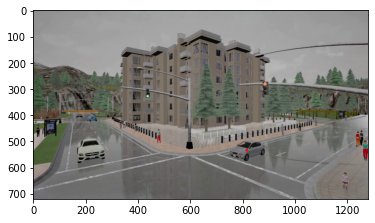

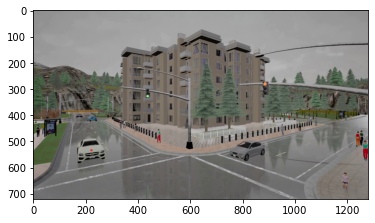

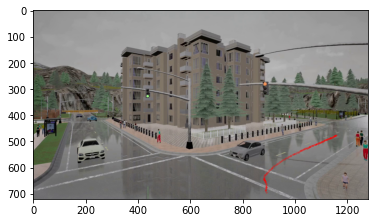

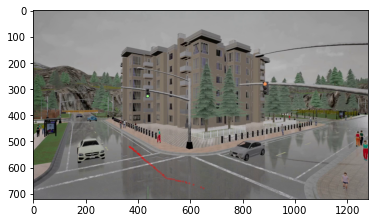

In [7]:
# draw overlay
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()

traffic_world.overlay_trajectory(cam_id, trajectory)
plt.show()

In [8]:
# render tracking video
filtered_world.get_video([cam_id])

(121, 4)
(121, 4)
(113, 4)
incorrect length: 113
(58, 4)
incorrect length: 58
output video files ./output/trafficScene_cam1car-1-a29b573e-70a0-4b6c-b19d-4f453867ce4f.mp4,./output/trafficScene_cam1car-4-a29b573e-70a0-4b6c-b19d-4f453867ce4f.mp4,./output/trafficScene_cam1car-14-a29b573e-70a0-4b6c-b19d-4f453867ce4f.mp4,./output/trafficScene_cam1car-21-a29b573e-70a0-4b6c-b19d-4f453867ce4f.mp4


In [9]:
times = filtered_world.get_time()
print("Times are:", times)

Times are: [(datetime.datetime(2021, 6, 8, 7, 10, 30, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 31, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 32, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 33, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 34, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 35, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 36, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 37, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 38, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 39, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 40, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 41, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 42, tzinfo=datetime.timezone.utc),), (datetime.dat

In [10]:
geos = filtered_world.get_bbox_geo()
print("Bbox geos are:",geos)

Bbox geos are: [(2.0351596988934304, 2.400814869380193, 1.0, 2.3896888485676846, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.3896888485676846, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.3896888485676846, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.747225030893968

In [11]:
print("Trajectory distances are:")
print(filtered_world.get_distance(0, 30))

Trajectory distances are:
[('{0@2021-06-08 07:10:30+00, 0@2021-06-08 07:10:31+00, 0@2021-06-08 07:10:32+00, 0@2021-06-08 07:10:33+00, 0@2021-06-08 07:10:34+00, 0@2021-06-08 07:10:35+00, 0@2021-06-08 07:10:36+00, 0@2021-06-08 07:10:37+00, 0@2021-06-08 07:10:38+00, 0@2021-06-08 07:10:39+00, 0@2021-06-08 07:10:40+00, 0@2021-06-08 07:10:41+00, 0@2021-06-08 07:10:42+00, 0@2021-06-08 07:10:43+00, 0@2021-06-08 07:10:44+00, 0@2021-06-08 07:10:45+00, 0@2021-06-08 07:10:46+00, 0@2021-06-08 07:10:47+00, 0@2021-06-08 07:10:48+00, 0@2021-06-08 07:10:49+00, 0@2021-06-08 07:10:50+00, 0@2021-06-08 07:10:51+00, 0@2021-06-08 07:10:52+00, 0@2021-06-08 07:10:53+00, 0@2021-06-08 07:10:54+00, 0@2021-06-08 07:10:55+00, 0@2021-06-08 07:10:56+00, 0@2021-06-08 07:10:57+00}',), ('{0@2021-06-08 07:10:30+00, 0@2021-06-08 07:10:31+00, 0@2021-06-08 07:10:32+00, 0@2021-06-08 07:10:33+00, 0@2021-06-08 07:10:34+00, 0@2021-06-08 07:10:35+00, 0@2021-06-08 07:10:36+00, 0@2021-06-08 07:10:37+00, 0@2021-06-08 07:10:38+00, 0

In [12]:
print("Trajectory speeds are:")
print(filtered_world.get_speed(0, 30))

Trajectory speeds are:
[(None,), (None,), (None,), (None,)]
